In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split    


   Feature1  Feature2  Feature3  Feature4  Feature5  Target
0 -1.280456  0.351687  0.189480  2.113371 -1.638728       0
1 -1.371674 -0.232364 -0.709441  2.196052 -1.475681       0
2  1.748137  2.173455  1.040062  0.665090  1.379844       1
3  0.815501 -0.612540 -0.048089  1.051042 -1.080790       0
4 -0.104343  1.071453  0.393307  0.895876 -1.338790       1


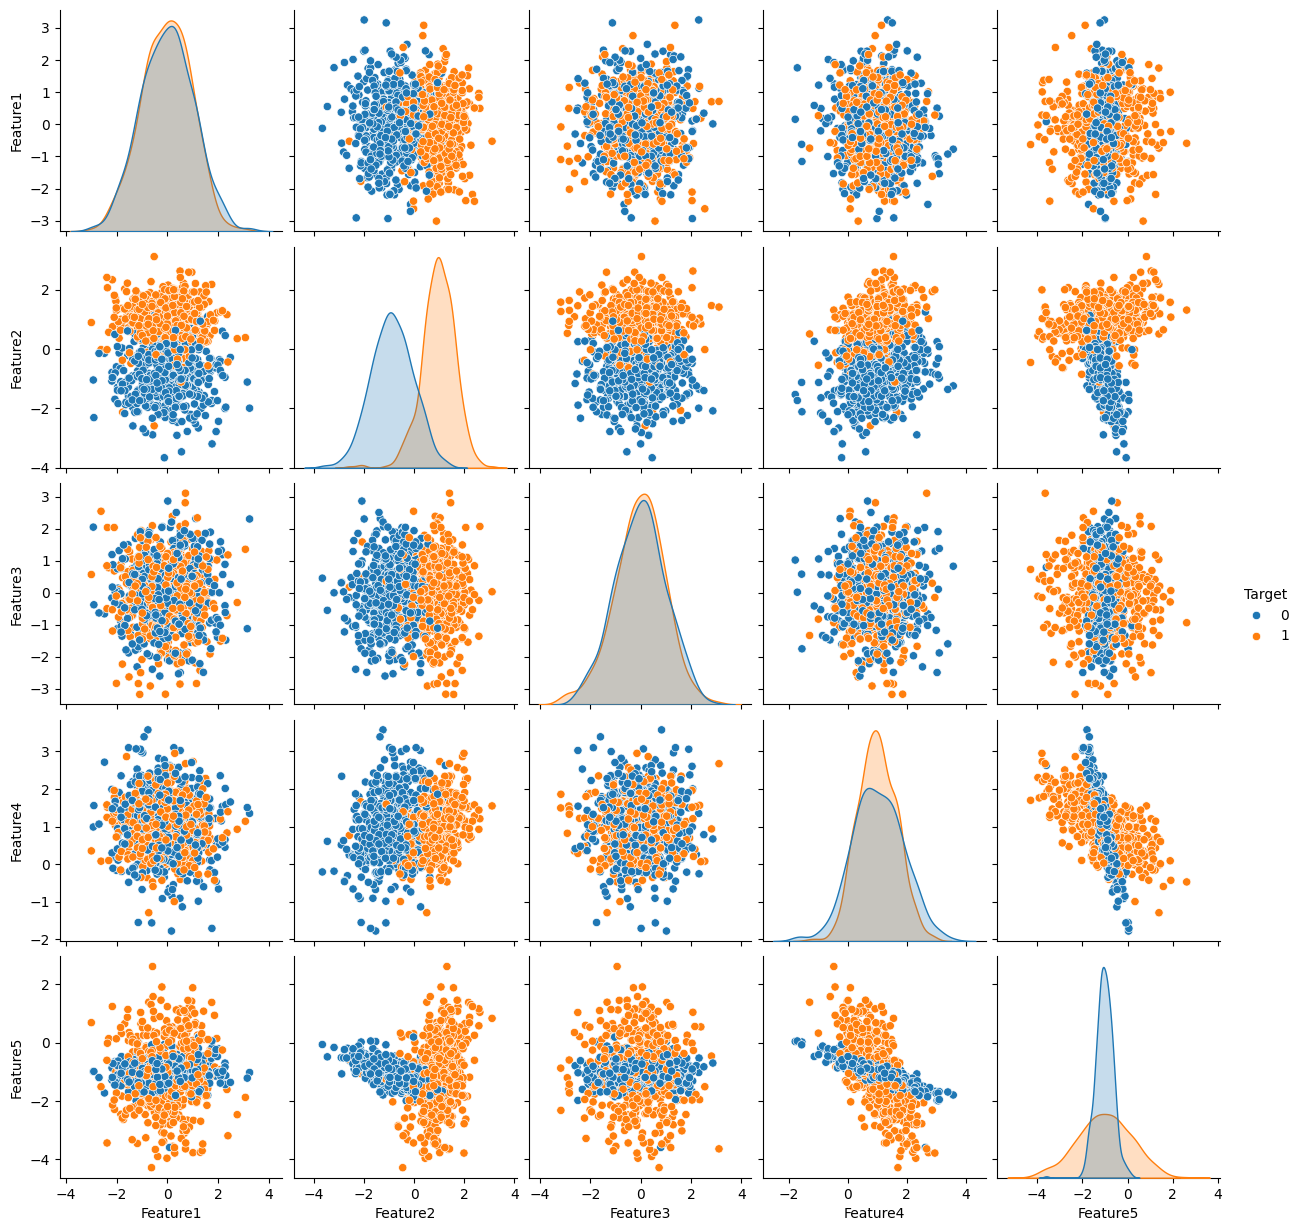

In [3]:
X,y=make_classification(n_samples=1000,n_features=5,n_informative=3,n_redundant=0,n_clusters_per_class=1,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
df=pd.DataFrame(X,columns=['Feature1','Feature2','Feature3','Feature4','Feature5'])
df['Target']=y
print(df.head())
sns.pairplot(df,hue='Target')
plt.show()

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(f'Accuracy: {accuracy*100:.2f}%')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred))
print('Classification Report:')
print(classification_report(y_test,y_pred))
# Hyperparameter Tuning
best_k=1
best_accuracy=0
for k in range(1,21):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    if accuracy>best_accuracy:
        best_accuracy=accuracy
        best_k=k    

Accuracy: 89.00%
Confusion Matrix:
[[94 11]
 [11 84]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       105
           1       0.88      0.88      0.88        95

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200

